# Adult Dataset

## Question: What factors are important for someone to have above or below 50K income?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\sina\Downloads\springboard_storytelling_data\adult.csv")
display(df.head(4))
print(df.info())

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [3]:
## Duplicated rows
df.duplicated().sum()

52

#### Highlights: 
* There is no missing values in the columns
* Many of the categorical columns including the response variable shall be one-hot encoded
* 52 rows are duplicated

** Missing values are includes as '?' and not NA

In [4]:
df.replace('?', np.nan, inplace=True)
print(df.isna().mean()*100)

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64


#### Drop the rows with missing values

In [5]:
df.dropna(inplace=True)
print(df.shape)

(45222, 15)


#### Drop the duplicated rows

In [6]:
df.drop_duplicates(inplace=True)
print(df.shape)

(45175, 15)


#### Drop irrelevant features

In [7]:
df.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1, inplace= True)

### Plotting

In [8]:
plt.style.use('ggplot')

#### Categorical Data

In [9]:
print(df['education'].value_counts(normalize= True), '\n')
print(df['marital-status'].value_counts(normalize= True), '\n')
print(df['occupation'].value_counts(normalize= True), '\n')
print(df['race'].value_counts(normalize= True), '\n')
print(df['gender'].value_counts(normalize= True))

HS-grad         0.326951
Some-college    0.218860
Bachelors       0.167327
Masters         0.055628
Assoc-voc       0.043343
11th            0.035838
Assoc-acdm      0.033359
10th            0.027072
7th-8th         0.018196
Prof-school     0.017377
9th             0.014964
12th            0.012728
Doctorate       0.012042
5th-6th         0.009895
1st-4th         0.004870
Preschool       0.001550
Name: education, dtype: float64 

Married-civ-spouse       0.465789
Never-married            0.322457
Divorced                 0.139325
Separated                0.031234
Widowed                  0.028268
Married-spouse-absent    0.012219
Married-AF-spouse        0.000708
Name: marital-status, dtype: float64 

Craft-repair         0.133038
Prof-specialty       0.132839
Exec-managerial      0.132374
Adm-clerical         0.122524
Sales                0.119646
Other-service        0.106364
Machine-op-inspct    0.065634
Transport-moving     0.051267
Handlers-cleaners    0.045268
Farming-fishing    

In [10]:
education_ordered= ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Prof-school', 
                    'Assoc-voc', 'Assoc-acdm', 'Some-college', 'HS-grad', 'Bachelors', 'Masters', 'Doctorate']
df['education']= pd.Categorical(df['education'], categories= education_ordered, ordered= True)

In [11]:
marital_ordered= ['Never-married', 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse', 
                 'Widowed', 'Divorced', 'Separated']
df['marital-status']= pd.Categorical(df['marital-status'], categories= marital_ordered, ordered= True)

In [12]:
race_ordered= ['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo']
df['race']= pd.Categorical(df['race'], categories= race_ordered, ordered= True)

##### Education

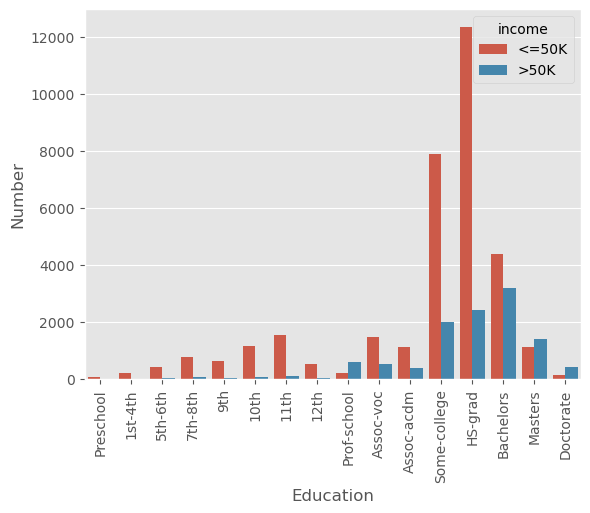

In [13]:
sns.countplot(x='education', hue='income', data= df, orient='h')
plt.xticks(rotation= 90)
plt.xlabel('Education')
plt.ylabel('Number')
plt.show()

Higher education leads to higher income\
People going to professional schools have higher income

##### Marital Status

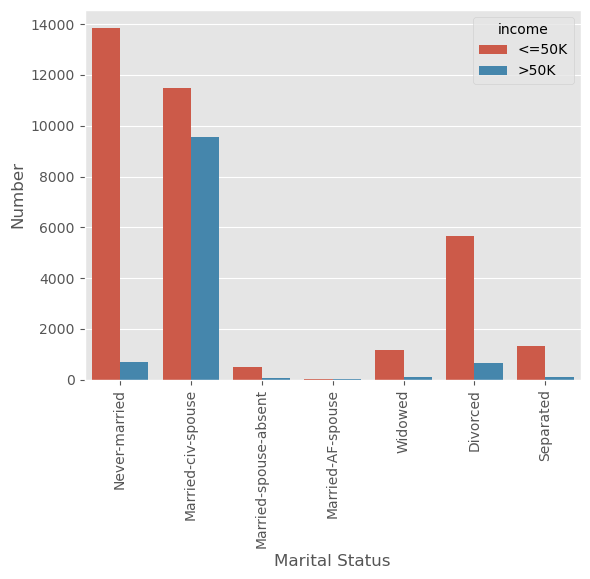

In [14]:
sns.countplot(x='marital-status', hue='income', data= df, orient='h')
plt.xticks(rotation= 90)
plt.xlabel('Marital Status')
plt.ylabel('Number')
plt.show()

People that are in a civil mariage have higher income

##### Occupation

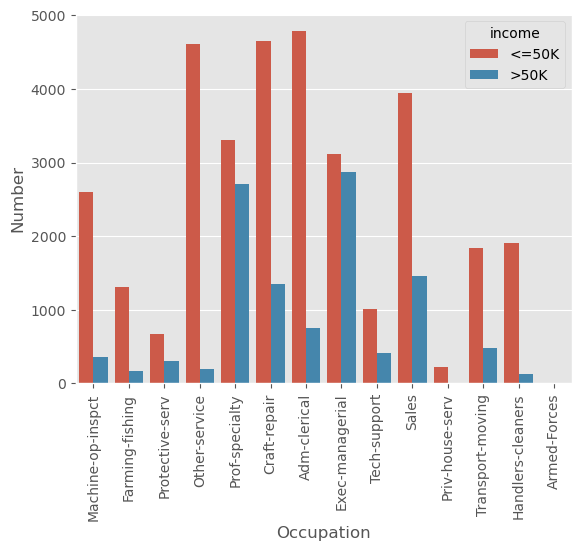

In [15]:
sns.countplot(x='occupation', hue='income', data= df, orient='h')
plt.xticks(rotation= 90)
plt.xlabel('Occupation')
plt.ylabel('Number')
plt.show()

People in executive roles or with professional specialty normally have higher income

##### Race

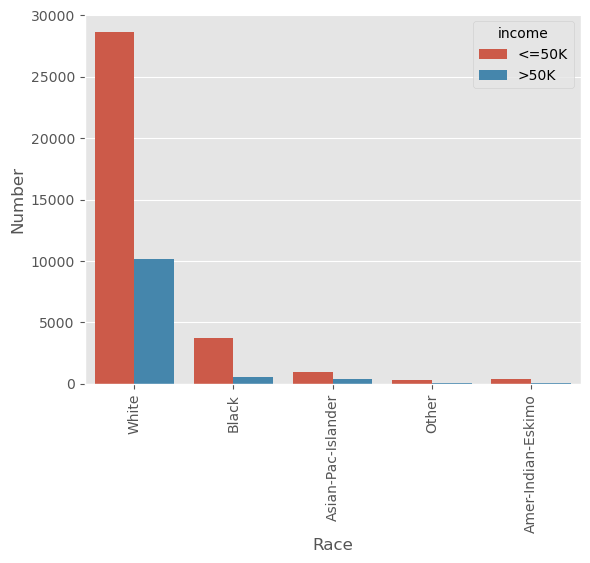

In [16]:
sns.countplot(x='race', hue='income', data= df, orient='h')
plt.xticks(rotation= 90)
plt.xlabel('Race')
plt.ylabel('Number')
plt.show()

White people have relatively higher income

##### Gender

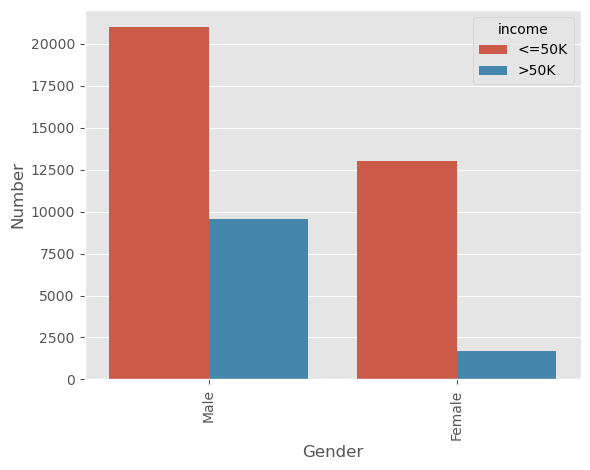

In [17]:
sns.countplot(x='gender', hue='income', data= df, orient='h')
plt.xticks(rotation= 90)
plt.xlabel('Gender')
plt.ylabel('Number')
plt.show()

Males normally have higher income compared to females

In [18]:
from scipy.stats import chi2_contingency

def chi2_cor(var1, var2= df['income']):
    contingency_table= pd.crosstab(var1, var2)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p<0.05:
        print('The two variables are correlated')
    else:
        print('The two variables are not correlated')
    return p

In [19]:
# 1. education
chi2_cor(df['education'])

The two variables are correlated


0.0

In [20]:
# 2. marital-status
chi2_cor(df['marital-status'])

The two variables are correlated


0.0

In [21]:
# 3. occupation
chi2_cor(df['occupation'])

The two variables are correlated


0.0

In [22]:
# 4. race
chi2_cor(df['race'])

The two variables are correlated


1.0129558773621714e-96

In [23]:
# 5. gender
chi2_cor(df['gender'])

The two variables are correlated


0.0

### Numerical features

<AxesSubplot:>

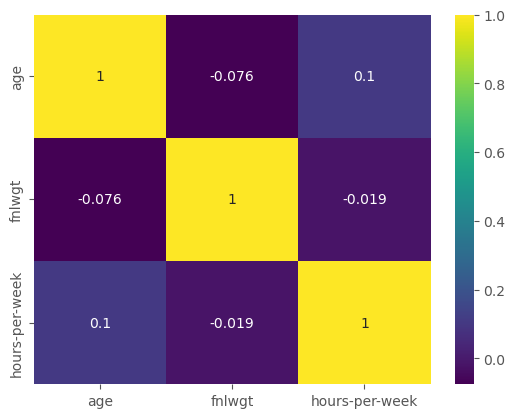

In [24]:
cor = df.corr()
sns.heatmap(cor, annot= True, cmap= 'viridis')

# There is no obvious correlation between the continuous variables!

##### Age

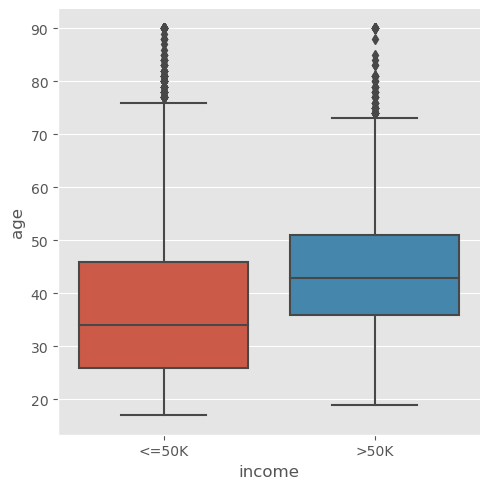

In [25]:
sns.catplot(x= 'income', y='age', data= df, kind= 'box')
plt.show()

Older people normaly have higher income

### Prepare the final dataset

In [54]:
from sklearn.linear_model import LogisticRegressionCV

y= np.where(df.income=='<=50K', 0, 1)
X= df.drop(['income', 'fnlwgt', 'hours-per-week', 'native-country'], axis=1)

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
X.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender'],
      dtype='object')

In [63]:
# Define the numerical and categorical feature columns
numerical_features = ['age']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(sparse=False, drop='first'), categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))

coefficients = pipeline.named_steps['classifier'].coef_

print("Coefficients of Logistic Regression Model:")
print(coefficients)

0.8246817930271167
Coefficients of Logistic Regression Model:
[[-0.68528573 -0.55554149 -0.08875485 -0.91603282 -0.98325833 -1.10379495
  -0.09498997  0.14662294 -0.94856299 -0.48575478 -0.52940211 -0.50016769
   1.13528514  1.14650597  1.76591539  2.91419664  0.64232517  2.23071019
  -1.09423034  3.06168553  0.99285312  1.7413492   1.96671381  0.19232347
  -0.72513291 -0.00578054  0.35564873  0.01275151  0.10994262  0.99256982
  -0.62964317 -0.76674615 -0.2786202  -0.94190628 -1.21128062  0.63852078
   0.62912022  0.43065468  0.61877138  0.10870707  0.38212183 -0.89726407
  -1.00537271  0.07468356  0.93312099  0.39229743  0.42629752  0.19760362
   0.54825408  0.76377449]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### We can predict if somebody's income is either above or below 50k with 82% accuracy

In [90]:
X_onehot= pd.get_dummies(X, drop_first=True)
X_onehot= X_onehot.astype('int64')

In [91]:
from statsmodels.api import Logit

model= Logit(y, X_onehot).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.365373
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45175
Model:                          Logit   Df Residuals:                    45124
Method:                           MLE   Df Model:                           50
Date:                Wed, 03 Jan 2024   Pseudo R-squ.:                  0.3477
Time:                        22:50:02   Log-Likelihood:                -16506.
converged:                       True   LL-Null:                       -25302.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
age                                      0.0215      0.001     16.977      0.000       0.019       0.024
workclass_Local-gov                     -0.7707      0.087     -8.882      0.000      -0.941      -0.601
workclass_Private                       -0.6027      0.072     -8.389      0.000      -0.744      -0.462
workclass_Self-emp-inc                  -0.2175      0.094     -2.309      0.021      -0.402      -0.033
workclass_Self-emp-not-inc              -1.0570      0.084    -12.515      0.000      -1.222      -0.891
workclass_State-gov                     -1.0264      0.096    -10.687      0.000      -1.215      -0.838
workclass_Without-pay                   -1.7029      0.800     -2.129      0.033      -3.270      -0.136
education_1st-4th                       -4.4863      0.422    -10.638      0.000      -5.313      -3.660
education_5th-6th                       -4.1831      0.304    -13.750      0.000      -4.779      -3.587
education_7th-8th                       -4.2063      0.249    -16.910      0.000      -4.694      -3.719
education_9th                           -4.0755      0.267    -15.290      0.000      -4.598      -3.553
education_10th                          -3.7753      0.235    -16.072      0.000      -4.236      -3.315
education_11th                          -3.6341      0.232    -15.674      0.000      -4.089      -3.180
education_12th                          -3.3193      0.266    -12.489      0.000      -3.840      -2.798
education_Prof-school                   -0.4918      0.225     -2.186      0.029      -0.933      -0.051
education_Assoc-voc                     -2.3766      0.208    -11.423      0.000      -2.784      -1.969
education_Assoc-acdm                    -2.3042      0.211    -10.935      0.000      -2.717      -1.891
education_Some-college                  -2.5263      0.201    -12.562      0.000      -2.920      -2.132
education_HS-grad                       -2.8758      0.201    -14.320      0.000      -3.269      -2.482
education_Bachelors                     -1.7084      0.202     -8.475      0.000      -2.104      -1.313
education_Masters                       -1.3070      0.207     -6.310      0.000      -1.713      -0.901
education_Doctorate                     -0.5880      0.234     -2.517      0.012      -1.046      -0.130
marital-status_Married-civ-spouse        1.1013      0.198      5.566      0.000       0.714       1.489
marital-status_Married-spouse-absent     0.5671      0.166      3.411      0.001       0.241       0.893
marital-status_Married-AF-spouse         1.3428      0.459      2.928      0.003       0.444       2.242
marital-status_Widowed                   0.4786      0.120      3.984      0.000       0.243       0.714
marital-status_Divorced                  0.4794      0.066      7.302      0.000       0.351       0.608
marital-status_Separated                 0.4228      0.123      3.429      0.001       0.18